# NB: From Functions to Classes

Programming for Data Science

To get a better idea of what classes are and how they work, let's motivate the concept.

Let's look at how classes evolve from and improve upon functional groups, discussed previously.


## Method 1: Functions Relaying Data

Let's first define a set of functions that work in a sequence, where the return value of one is the argument of the other.

In this example, we want to simulate the rolling of dice in a game of chance.

To do this, we could write three functions:

- One to define a die.
- One to perform the action of rolling a die.
- One to show the results.

In [1]:
import pandas as pd
import numpy as np

def create_die(weights):
    "Create a simple die object of n sides with arbitrary weights. Return the die as a DataFrame."
    n_sides = len(weights)
    my_probs = [i/sum(weights) for i in weights]
    my_die = pd.DataFrame({
        'side': range(1, n_sides + 1),
        'weights': my_probs
    })
    return my_die

def roll_dice(my_die, n_rolls=1):
    "Roll a die one or more times and return the results as a Series."
    results = []
    for i in range(n_rolls):
        result = my_die.side.sample(weights=my_die.weights).values[0]
        results.append(result)
    return pd.Series(results)

def plot_results(my_results):
    "Show the results of rolling the dice n times with a simple bar graph."
    my_results.value_counts().sort_index().plot.bar(rot=0);

Now let's use the functions together and simulate the rolling of $10$ dice.

First, we create a fair die.

In [2]:
fair_die = create_die([1,1,1,1,1,1,1])
fair_die

,side,weights
0,1,0.142857
1,2,0.142857
2,3,0.142857
3,4,0.142857
4,5,0.142857
5,6,0.142857
6,7,0.142857


Next, we roll our die $n$ times.

In [3]:
n_rolls = 10
fair_results = roll_dice(fair_die, n_rolls)
fair_results

0    5
1    1
2    2
3    5
4    1
5    2
6    4
7    3
8    7
9    3
dtype: int64

Finally, we plot the results:

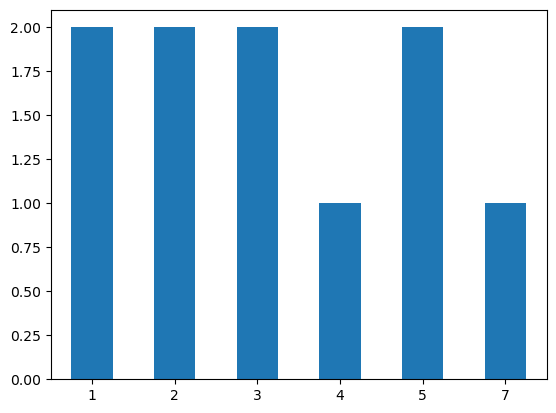

In [4]:
plot_results(fair_results)

Let's play with an unfair die.

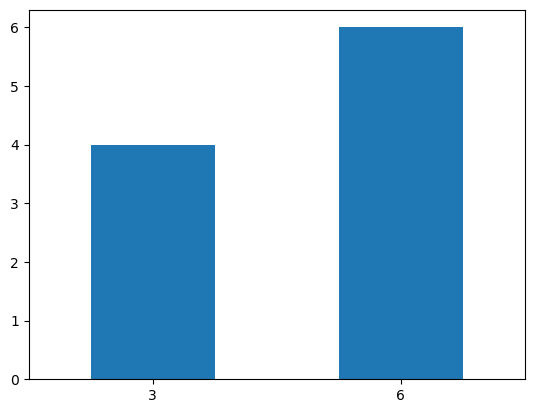

In [5]:
unfair_die = create_die([1,1,1,1,1,5])
unfair_results = roll_dice(unfair_die, n_rolls)
plot_results(unfair_results)

Finally, let's write a function to peform all of these actions at once.

In [6]:
def do_it_all(weights, n_rolls):
    plot_results(roll_dice(create_die(weights), n_rolls))

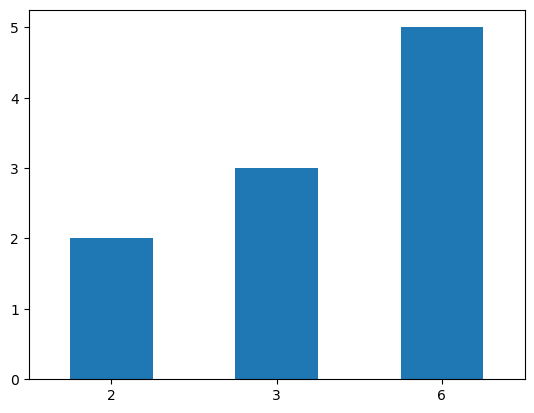

In [7]:
do_it_all([1,1,1,1,1,10], n_rolls)

Note the nested structure of the functions.

Each function uses the result of the previous.

The pattern is to relay or hand-off data from one function to the other, as a ball in a rugby match.

## Method 2: Functions Sharing Globals

Let's try something different now.

Instead of passing the data from function to function, let's **centralize** our data in a dictionary called `config`.

We'll treat this dictionary as a **global** variable.

Iniitally, `config` has this structure:

```python

config = {
    "die1": {
        "weights": [...]
    },
    "die2": {
        "weights": [...]
    },
    ...
}
```

In [8]:
def create_die2(die_id):
    "Create a die from data in config and add results to config."
    global config
    config[die_id]['die'] = None
    weights = config[die_id]['weights']
    n_sides = len(weights)
    my_probs = [i/sum(weights) for i in weights]
    config[die_id]['die'] = pd.DataFrame({
        'side': range(1, n_sides + 1),
        'weights': my_probs
    })

def roll_dice2(die_id):
    "Roll the die from the config and save results in the config."
    global config
    global n_rolls2
    config[die_id]['results'] = None
    my_die = config[die_id]['die']
    results = []
    for i in range(n_rolls2):
        result = my_die.side.sample(weights=my_die.weights).values[0]
        results.append(result)
    config[die_id]['results'] = pd.Series(results)

def plot_results2(die_id):
    "Plot the results in the config."
    global config
    my_results = config[die_id]['results']
    my_results.value_counts().sort_index().plot.bar(rot=0);

def do_it_all2(die_id):
    "Do everything."
    global config
    global n_rolls2
    print("Die ID:", die_id)
    print("Weights:", config[die_id]['weights'])
    print("Rolls:", n_rolls2)
    create_die2(die_id)
    roll_dice2(die_id)
    plot_results2(die_id)

Note that it is not strictly necessary to use the `global` keyword in the functions about, since `config` and `n_rolls2` are already nvisible to the functions, and none of the functions reassign the variables, which would make them local. Sometimes we use `global` to fix the scope of variables just in case we reassign them.

To use these functions, we start by populating our configuration  with kinds of dice.

We define an fair and an unfair version.

As we can see from the method definitions in our class, the dictionaries associated with each key will take on more keys.

In [9]:
config = {
    'fair': {
        'weights': [1,1,1,1,1,1]
    },
    'unfair': {
        'weights': [1,1,1,1,10,100],
    }
}

Now we call the main function `do_it_all()` by giving the key of the die type with which we wish to play.

We also assign to the global variable the number of rolls.

Die ID: fair
Weights: [1, 1, 1, 1, 1, 1]
Rolls: 10


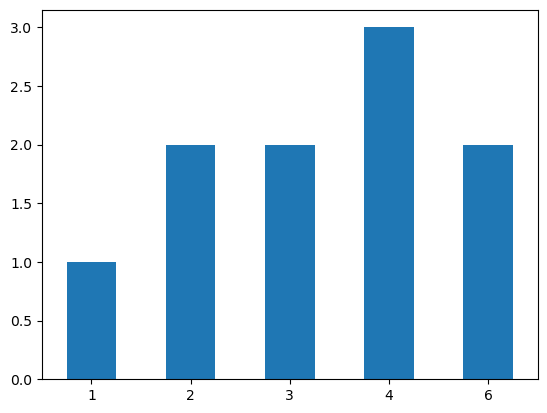

In [10]:
n_rolls2 = 10
do_it_all2('fair')

Let's try it with the unfair die.

Die ID: unfair
Weights: [1, 1, 1, 1, 10, 100]
Rolls: 10


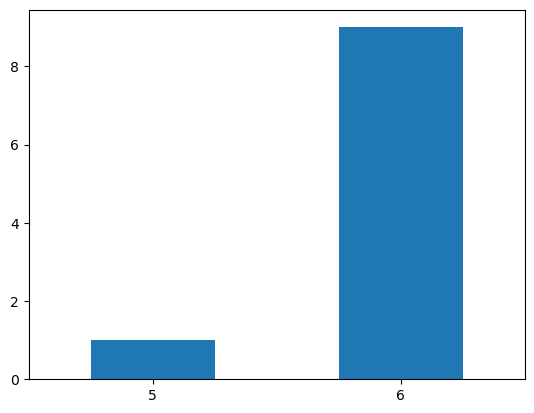

In [11]:
do_it_all2('unfair')

Note how `conig` has been modified.

In [12]:
config

{'fair': {'weights': [1, 1, 1, 1, 1, 1],
  'die':    side   weights
  0     1  0.166667
  1     2  0.166667
  2     3  0.166667
  3     4  0.166667
  4     5  0.166667
  5     6  0.166667,
  'results': 0    2
  1    6
  2    2
  3    4
  4    4
  5    4
  6    1
  7    6
  8    3
  9    3
  dtype: int64},
 'unfair': {'weights': [1, 1, 1, 1, 10, 100],
  'die':    side   weights
  0     1  0.008772
  1     2  0.008772
  2     3  0.008772
  3     4  0.008772
  4     5  0.087719
  5     6  0.877193,
  'results': 0    6
  1    6
  2    6
  3    6
  4    6
  5    5
  6    6
  7    6
  8    6
  9    6
  dtype: int64}}

Now let's up the number of rolls a bit and roll both dice.

Die ID: unfair
Weights: [1, 1, 1, 1, 10, 100]
Rolls: 1000


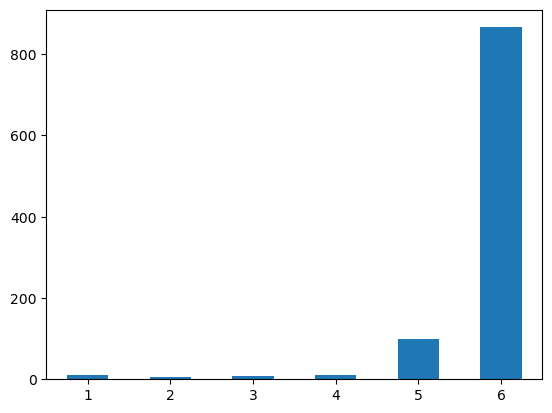

In [13]:
n_rolls2 = 1000 # By changing this we affect all uses of the functions until we change it.
do_it_all2('unfair')

Die ID: fair
Weights: [1, 1, 1, 1, 1, 1]
Rolls: 1000


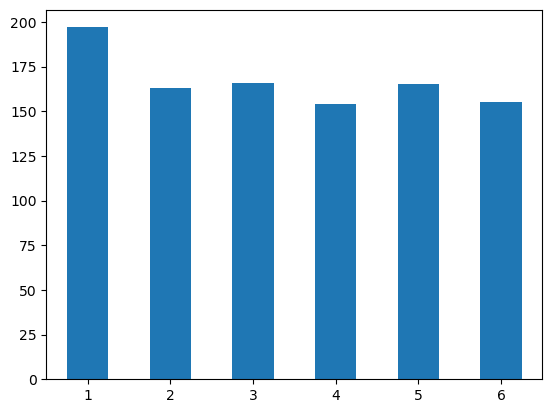

In [14]:
do_it_all2('fair')

## Method 3: Functions as Methods in a Class

Finally, let's define a class that combines the configuration data structure and all the functions as attributes and methods.

In [15]:
class DieGame():
        
    def __init__(self):
        "Initalize the object by defining the number of rolls and the die weights. These can be changed after initialization."
        self.n_rolls = 10
        self.weights = [1,1,1,1,1,1]
        
    def create_die(self):
        "Create the die using the object's weights. Save to self as a DataFrame."
        self.n_sides = len(self.weights)
        self.my_probs = [i/sum(self.weights) for i in self.weights]
        self.die = pd.DataFrame({
            'side': range(1, self.n_sides + 1),
            'weights': self.my_probs
        })
    
    def roll_die(self):
        "Roll the die using the object's specified number of rolls and die. Save to self as a Series."
        results = []
        for i in range(self.n_rolls):
            result = self.die.side.sample(weights=self.die.weights).values[0]
            results.append(result)
        self.results = pd.Series(results)        
        
    def plot_results(self):
        "Plot the results using the state stored in self."
        prob_model = pd.Series({i+1:round(p, 2) for i, p in enumerate(self.my_probs)})
        print("Sides:", self.n_sides)
        print("Model:")
        print(prob_model)
        print("Rolls:", self.n_rolls)
        self.results.value_counts().sort_index().plot.bar(rot=0);
        
    # We add another method because it's so easy :-)
    def plot_probs(self):
        "Plot the probabilities of the die sides."
        pd.Series(self.my_probs).plot.pie(title="Die Model")
        
    def do_it_all(self):
        "The main function that does everything."
        self.create_die()
        self.roll_die()
        self.plot_results()
        

Let's use our class, but change the number of rolls.

Sides: 6
Model:
1    0.17
2    0.17
3    0.17
4    0.17
5    0.17
6    0.17
dtype: float64
Rolls: 100


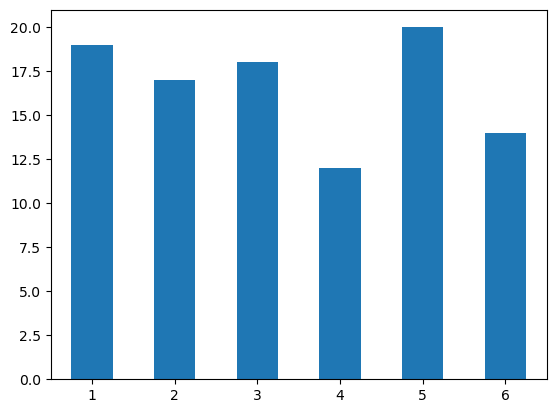

In [16]:
game_1 = DieGame()
game_1.n_rolls = 100 # We override the default
game_1.do_it_all()

And let's visualize the probabilities of each side as a pie chart.

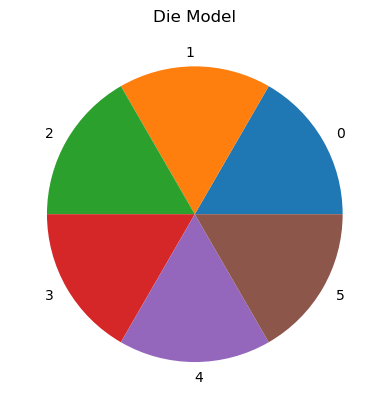

In [17]:
game_1.plot_probs()

Let's create a new object, this time overriding both initial values.

Sides: 6
Model:
1    0.04
2    0.04
3    0.04
4    0.18
5    0.36
6    0.36
dtype: float64
Rolls: 100


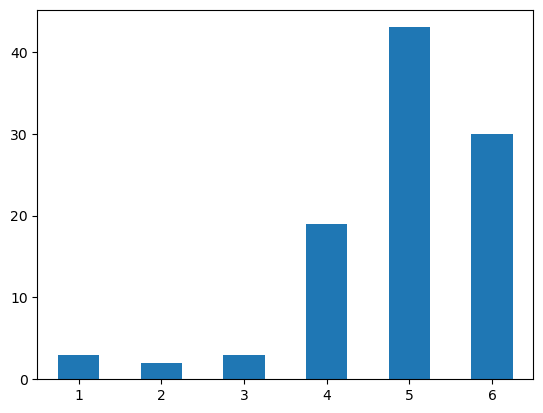

In [18]:
game_2 = DieGame()
game_2.n_rolls = 100
game_2.weights = [1,1,1,5,10,10]
game_2.do_it_all()

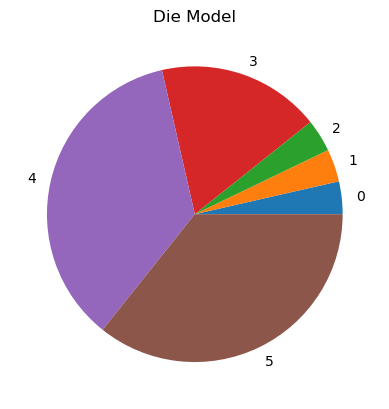

In [19]:
game_2.plot_probs()

## Some Conclusions

Note how the class definition basically wraps both data and functions into a single entity.

The class defines a scope that replaces the use of globals in our second method.

`self` replaces the need to create a shared, global data structure like `config`.

Instead, each method shares the data in `self`.

Note also that we don't pass arguments to the object as we do with functions (although we can). 

At each stage we interact with the object by setting attributes and calling methods.

## Note: A More Efficient Way To Roll

In the above examples, instead of using a for loop and calling the `.sample()` method each time to simulate the rolling of a die, we can do this:

```python
self.results = self.die.side.sample(self.n_rolls, replace=True, weights=self.die.weights)
```

The `.sample()` function takes an argument to specify the number of samples to draw.  But be careful to set the `replace` parameter to `True` or `False`, depending on the kind of process you are trying to model.